1-NN Classification
Testpoint (width, height): (25.0, 32.0) classified as Pikachu
Testpoint (width, height): (24.2, 31.5) classified as Pikachu
Testpoint (width, height): (22.0, 34.0) classified as Pikachu
Testpoint (width, height): (20.5, 34.0) classified as Pichu


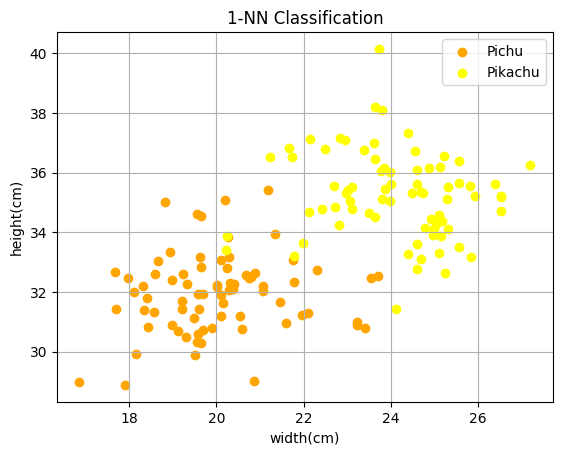

10-NN Classification
Test point (width, height): (25.0, 32.0) is classified as Pikachu
Test point (width, height): (24.2, 31.5) is classified as Pikachu
Test point (width, height): (22.0, 34.0) is classified as Pikachu
Test point (width, height): (20.5, 34.0) is classified as Pichu

Your point (width, height): (25.0, 37.0) is classified as Pikachu


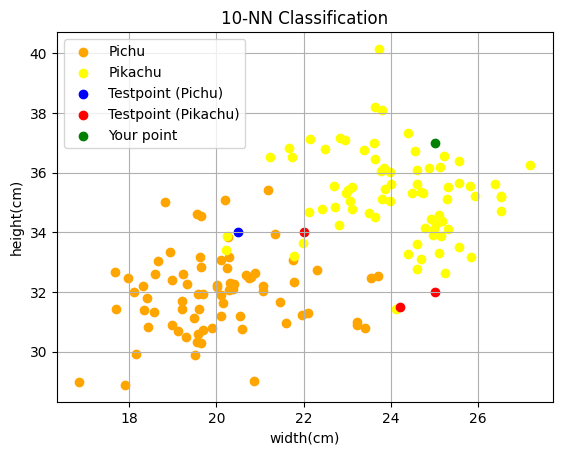

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# GRUNDUPPGIFT
with open('datapoints.txt', 'r') as datafile:
    data = datafile.read().splitlines()
data.pop(0)    # tar bort första raden eftersom den inte innehåller datapunkter

dataset = []
for line in data:
    line_parts = line.split(',')
    w = float(line_parts[0])
    h = float(line_parts[1])
    label = line_parts[2].strip()
    if label == '0':
        label = 'Pichu'
    elif label == '1':
        label = 'Pikachu'

    dataset.append((w, h, label))

# förbereder plottlistor för att enklare plotta träningsdatan i olika färger
pikachu_x = []
pikachu_y = []
pichu_x = []
pichu_y = []

for w, h, label in dataset:
    if label == 'Pikachu':
        pikachu_x.append(w)
        pikachu_y.append(h)
    else:
        pichu_x.append(w)
        pichu_y.append(h)

testpoints = []
with open('testpoints.txt', 'r') as testfile:
    for line in testfile.read().splitlines()[1:]:    # hoppar över rubriken eftersom den inte innehåller testpunkter
        line = line.split('.', 1)[1].strip(' ()')
        w, h = map(float, line.split(','))    # omvandlar båda till float med map
        testpoints.append((w, h))

def distance (p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)    # beräknar euklidiskt avstånd mellan två punkter

# närmaste punkten till antingen pichu eller pikachu
def classify_nearest(test_point):
    nearest = None
    nearest_dist = float('inf')    # startar med oändligt ('inf') stort avstånd
    for w, h, label in dataset:
        d = distance(test_point, (w, h))
        if d < nearest_dist: # uppdaterar om en närmare punkt hittas
            nearest_dist = d
            nearest = label
    return nearest

# Klassificerar testpunkter
print('1-NN Classification')
for tp in testpoints:
    print(f'Testpoint (width, height): {tp} classified as {classify_nearest(tp)}')

# Visualiserar träningsdata och testpunkterna
plt.title('1-NN Classification')
plt.xlabel('width(cm)')
plt.ylabel('height(cm)')
plt.scatter(pichu_x, pichu_y, color = 'orange', label = 'Pichu')
plt.scatter(pikachu_x, pikachu_y, color = 'yellow', label = 'Pikachu')
plt.grid()
plt.legend()
plt.show()

# UPPGIFT 1 - användaren får mata in en testpunkt, låter algoritmen avgöra dess klass
user_point = None
while True:
    try:    # felhantering för eventuell ogiltig inmatning
        w = float(input('Enter width (cm): '))
        h = float(input('Enter height (cm): '))
        
        if w <= 0 or h <= 0:
            print('Error: Width and height must be positive numbers. Try again.\n')
            continue

        classification = classify_nearest((w, h))
        user_point = (w, h, classification)
        break
    except ValueError:
        print('Error: Please enter valid numeric values. Try again.\n')

# UPPGIFT 2 - väljer 10 närmaste punkterna till testpunkt genom majoritetsröstning
def classify_knn(testpoint, k= 10):
    distances = []
    for w, h, label in dataset:
        d = distance(testpoint, (w, h))
        distances.append((d, label))
    distances.sort(key=lambda x: x[0])    # sorterar distances utifrån avståndet så de närmaste punkterna (grannarna) hamnar först    
    nearest_neighbors = [label for _, label in distances[:k]]
    if nearest_neighbors.count('Pichu') > nearest_neighbors.count('Pikachu'):    # majoritetsröstning
        return 'Pichu'
    else:
        return 'Pikachu'

print('10-NN Classification')
test_pichu_x = []
test_pichu_y = []
test_pikachu_x = []
test_pikachu_y = []

for tp in testpoints:    # klassifierar testpunkterna och samlar dem i listorna ovan för plottning
    classification = classify_knn(tp)
    print(f'Test point (width, height): {tp} is classified as {classification}')
    if classification == 'Pichu':
        test_pichu_x.append(tp[0])
        test_pichu_y.append(tp[1])
    else:
        test_pikachu_x.append(tp[0])
        test_pikachu_y.append(tp[1])

if user_point:
    print(f'\nYour point (width, height): {user_point[:2]} is classified as {user_point[2]}')

# visualiserar resultatet
plt.title('10-NN Classification')
plt.xlabel('width(cm)')
plt.ylabel('height(cm)')
plt.scatter(pichu_x, pichu_y, color = 'orange', label = 'Pichu')
plt.scatter(pikachu_x, pikachu_y, color = 'yellow', label = 'Pikachu')
plt.scatter(test_pichu_x, test_pichu_y, color = 'blue', label = 'Testpoint (Pichu)')
plt.scatter(test_pikachu_x, test_pikachu_y, color = 'red', label = 'Testpoint (Pikachu)')
plt.grid()

if user_point:    # plottar användarens punkt om den finns
    plt.scatter(user_point[0], user_point[1],
                color = 'green', label = 'Your point')
plt.legend()
plt.show()
